In [1]:
# ⚠️ Run this cell only once - to modify the working directory and import paths to parent directory one level up.

import sys
import os

# Change cwd to project root (one level up from 'notebooks')
os.chdir("..")

# Add project root to sys.path to allow importing from 'src'
sys.path.append(os.getcwd())

## 1. Load the gpx data

In [2]:
# gpx_file_path = "data/31_Mar_2025_10_30_57.gpx"
# gpx_file_path = "data/2024-10-17_13_02_around_thi.gpx"
# gpx_file_path = "data/2024-10-24_12_42_hohe_mandel.gpx"
# gpx_file_path = "data/around_uni_gold.gpx"
# gpx_file_path = "data/around_uni_williams.gpx"
# gpx_file_path = "data/DollnsteinRoutePrashil.gpx"
gpx_file_path = "data/DollnsteinRouteTom.gpx"

In [3]:
from src.models import Track

track_1 = Track.from_gpx_file(gpx_file_path)

## 2. Comparision with online APIs

In [4]:
from src.elevation_api import OpenElevationAPI, OpenStreetMapElevationAPI

track_openstreetmap = track_1.with_api_elevations(OpenStreetMapElevationAPI)
track_openelevation = track_1.with_api_elevations(OpenElevationAPI)

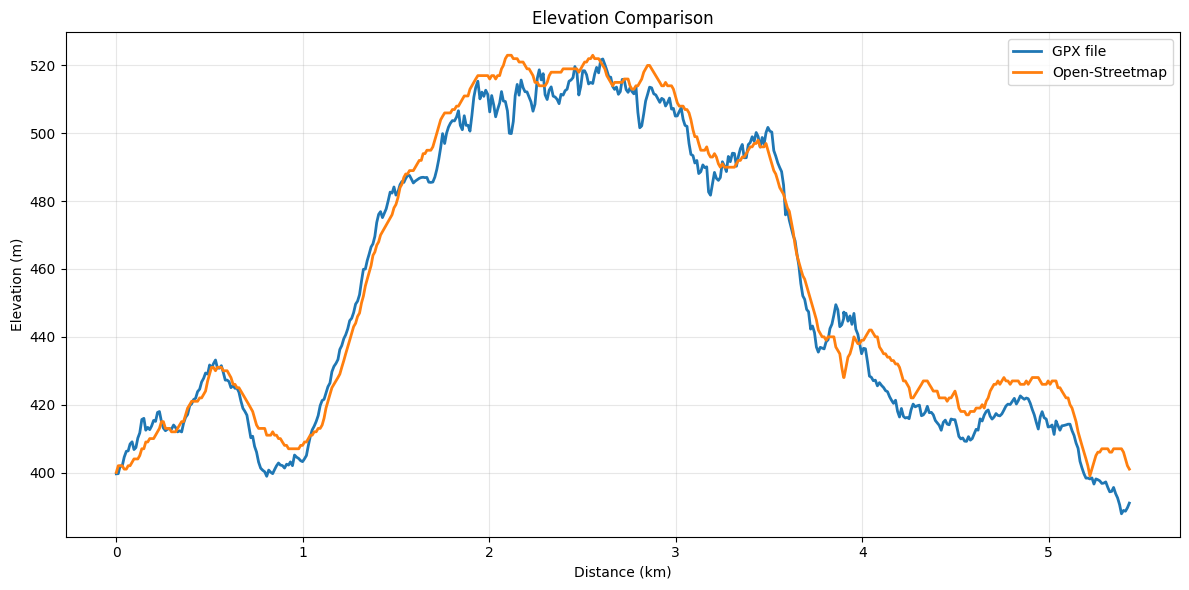

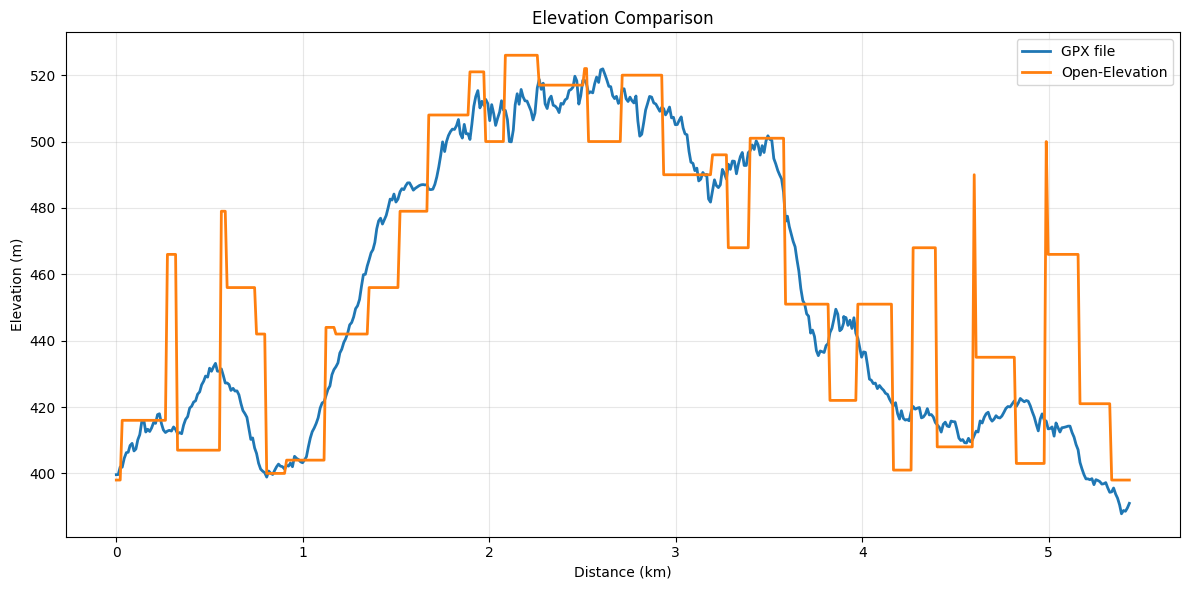

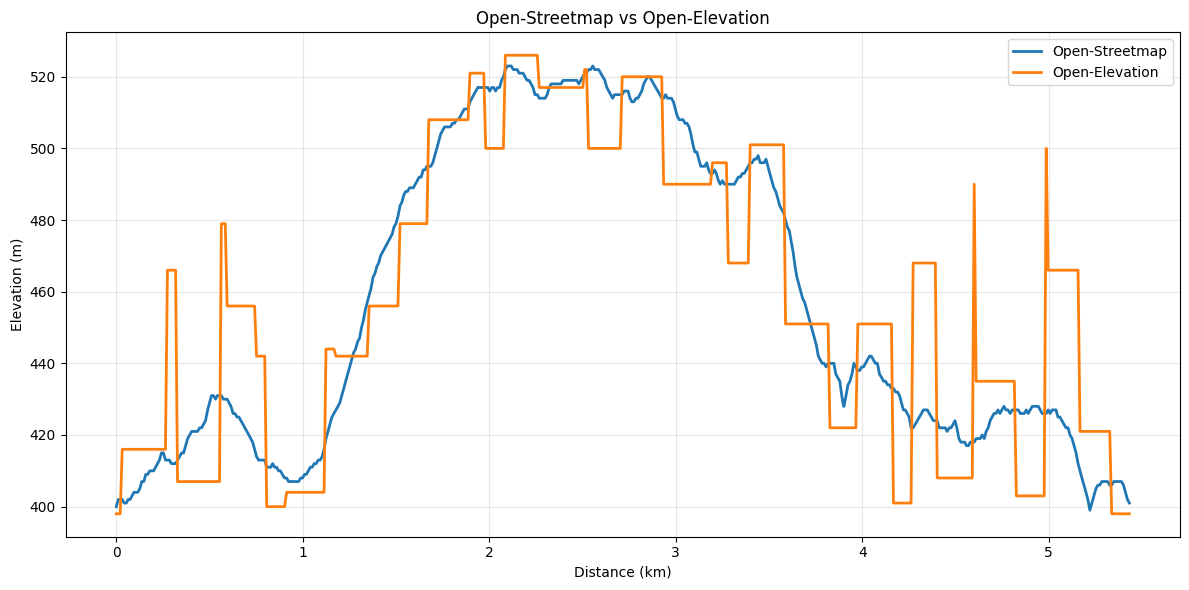

In [5]:
from src.plotter import Plotter

# Comparision with openstreetmap
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_openstreetmap.elevation_profile, "Open-Streetmap"),
]).plot_distance_vs_elevation()

# Comparision with Open-Elevation
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_openelevation.elevation_profile, "Open-Elevation"),
]).plot_distance_vs_elevation()

# Comparision between Open-Streetmap and Open-Elevation
Plotter([
	(track_openstreetmap.elevation_profile, "Open-Streetmap"),
	(track_openelevation.elevation_profile, "Open-Elevation"),
]).plot_distance_vs_elevation(title="Open-Streetmap vs Open-Elevation")


## 3. Applying smoothing algorithm 

### Apply smoothing algorithm **LOESS V1** on the recorded data

In [6]:
track_1_loess_v1 = track_1.with_smoothed_elevations('loess_v1', window=0.75)

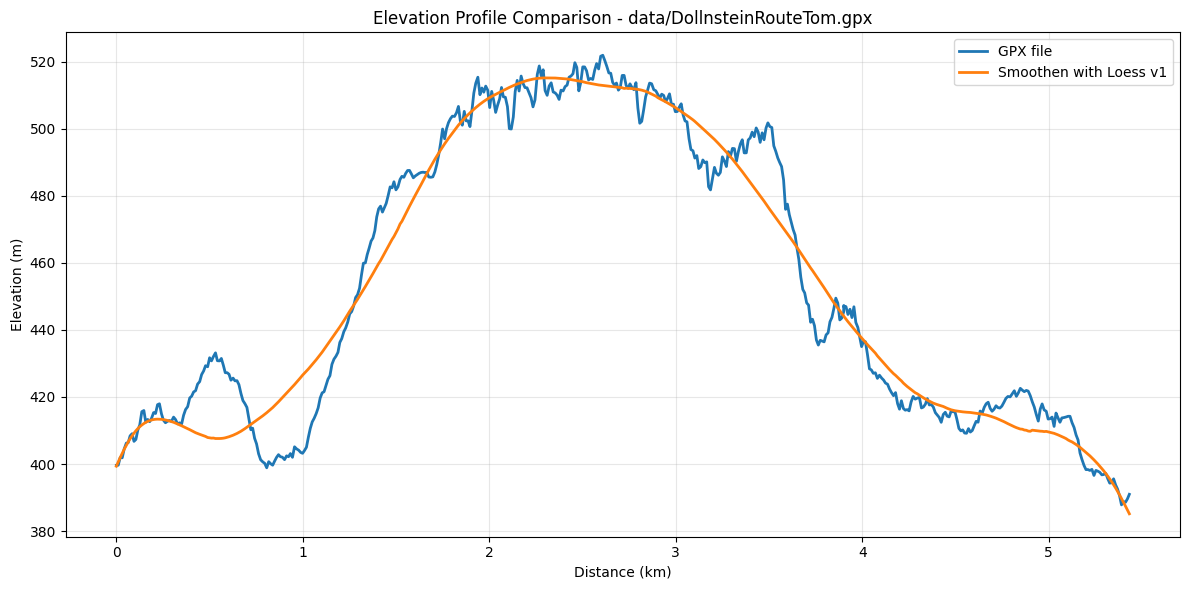

In [7]:
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_1_loess_v1.elevation_profile, "Smoothen with Loess v1"),
]).plot_distance_vs_elevation(title=f"Elevation Profile Comparison - {gpx_file_path}")	

### Apply smoothing algorithm **LOESS V2** on the recorded data

In [8]:
track_1_loess_v2 = track_1.with_smoothed_elevations('loess_v2')

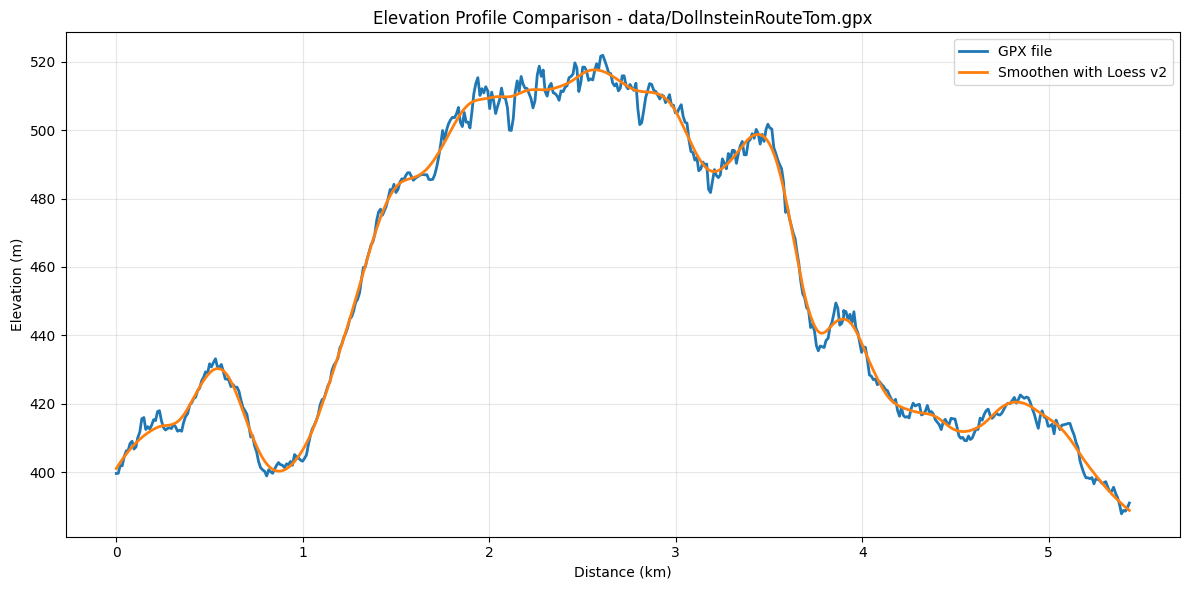

In [9]:
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_1_loess_v2.elevation_profile, "Smoothen with Loess v2"),
]).plot_distance_vs_elevation(title=f"Elevation Profile Comparison - {gpx_file_path}")

### Apply smoothing algorithm **spline** on the recorded data

In [10]:
track_1_spline = track_1.with_smoothed_elevations('spline')

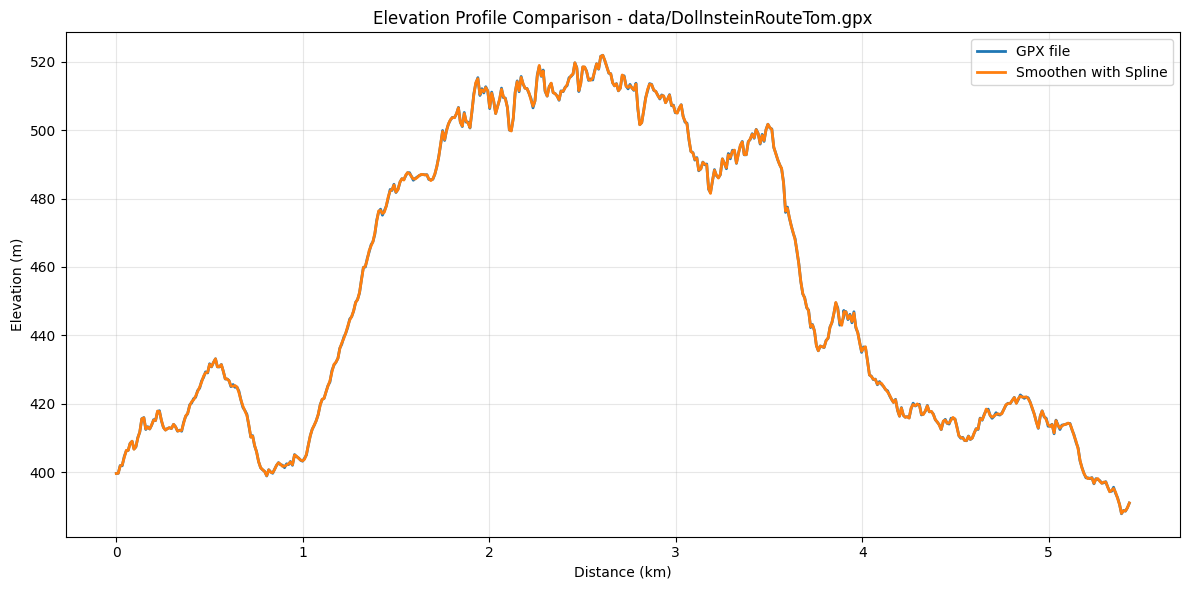

In [11]:
Plotter([
	(track_1.elevation_profile, "GPX file"),
	(track_1_spline.elevation_profile, "Smoothen with Spline"),
]).plot_distance_vs_elevation(title=f"Elevation Profile Comparison - {gpx_file_path}")

## 4. CLI usage

In [12]:
%run main.py -h

usage: main.py [-h] [--second-gpx SECOND_GPX] [--add-openstreetmap]
               [--add-openelevation] [--add-loess1] [--add-loess2]
               [--add-spline]
               [--sync-method {elevation_sync,start_sync,interpolate_elevations}]
               [--tolerance TOLERANCE] [--tolerance-method {standard,kdtree}]
               [--output OUTPUT] [--title TITLE]
               {3d,elevation,surface} base_gpx

Compare GPX Elevation Profiles

positional arguments:
  {3d,elevation,surface}
                        Plot type: '3d' for basic 3D plot, 'elevation' for
                        optional sync comparison, 'surface' for elevation
                        surface plot
  base_gpx              Path to the base GPX file

options:
  -h, --help            show this help message and exit
  --second-gpx SECOND_GPX
                        Add a second GPX file
  --add-openstreetmap   Add elevation data of base GPX using
                        OpenStreetMapElevationAPI
  --add-openel

### Plotting Normal Plots
Legends are automatically labeled based on the input source (e.g., "Second gpx", "Loess1", "Openstreetmap")

Required:  
  `base_gpx` file

Add more in the plot:  
  `--second-gpx` to plot a second GPX file  
  `--add-openstreetmap`, `--add-openelevation`, `--add-loess1`, `--add-loess2`, or `--add-spline` to generate comparison elevation from the base GPX


**Examples:**

In [13]:
%matplotlib inline

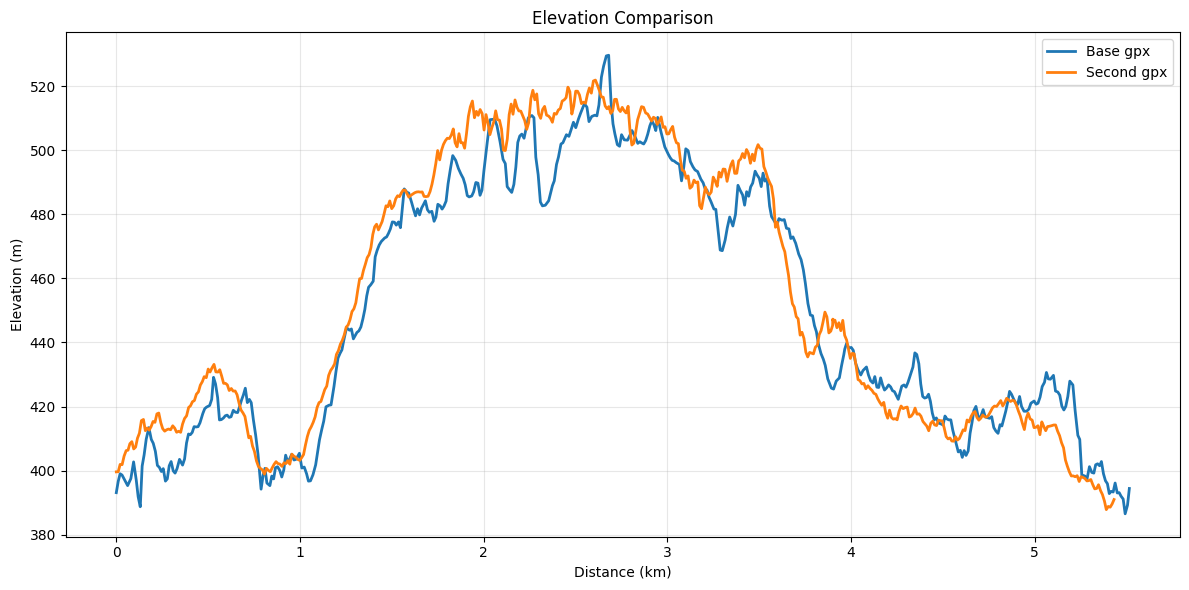

<Figure size 640x480 with 0 Axes>

In [14]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx --second-gpx data/DollnsteinRouteTom.gpx

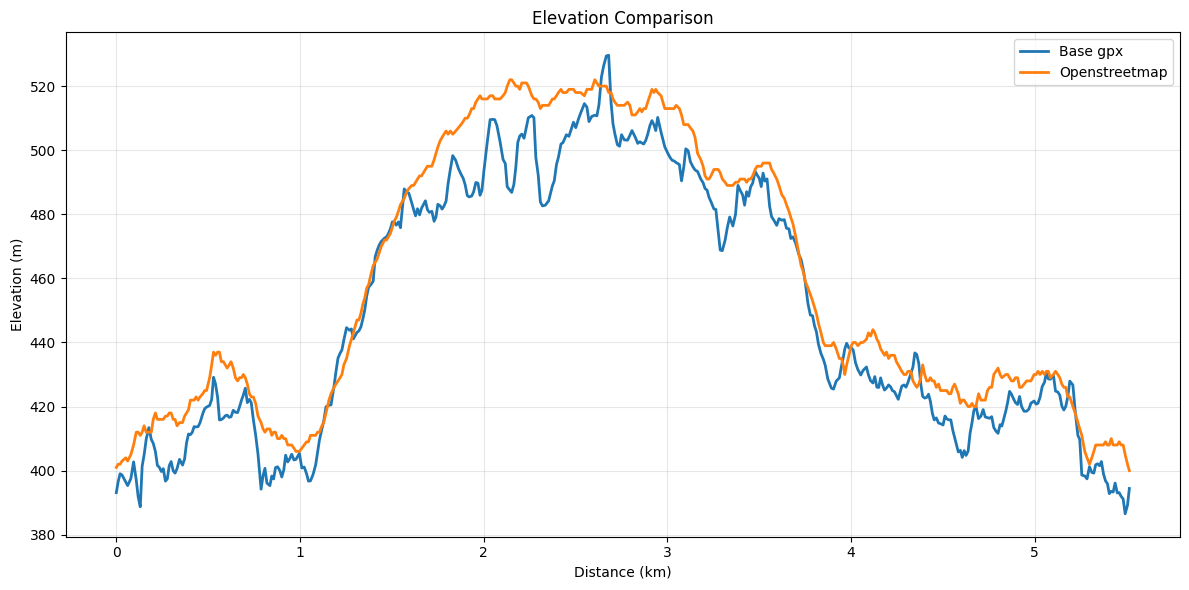

<Figure size 640x480 with 0 Axes>

In [15]:
# Add --add-openstreetmap or --add-openelevation
%run main.py elevation data/DollnsteinRoutePrashil.gpx --add-openstreetmap


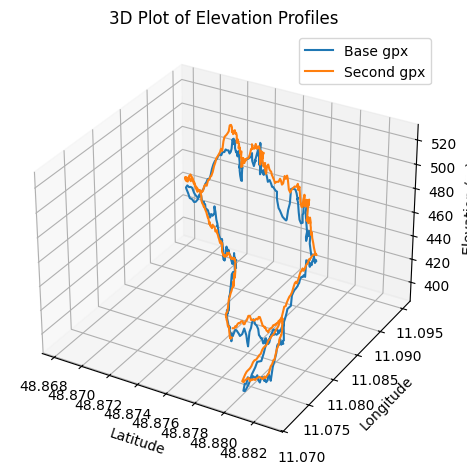

<Figure size 640x480 with 0 Axes>

In [16]:
%run main.py 3d data/DollnsteinRoutePrashil.gpx --second-gpx data/DollnsteinRouteTom.gpx

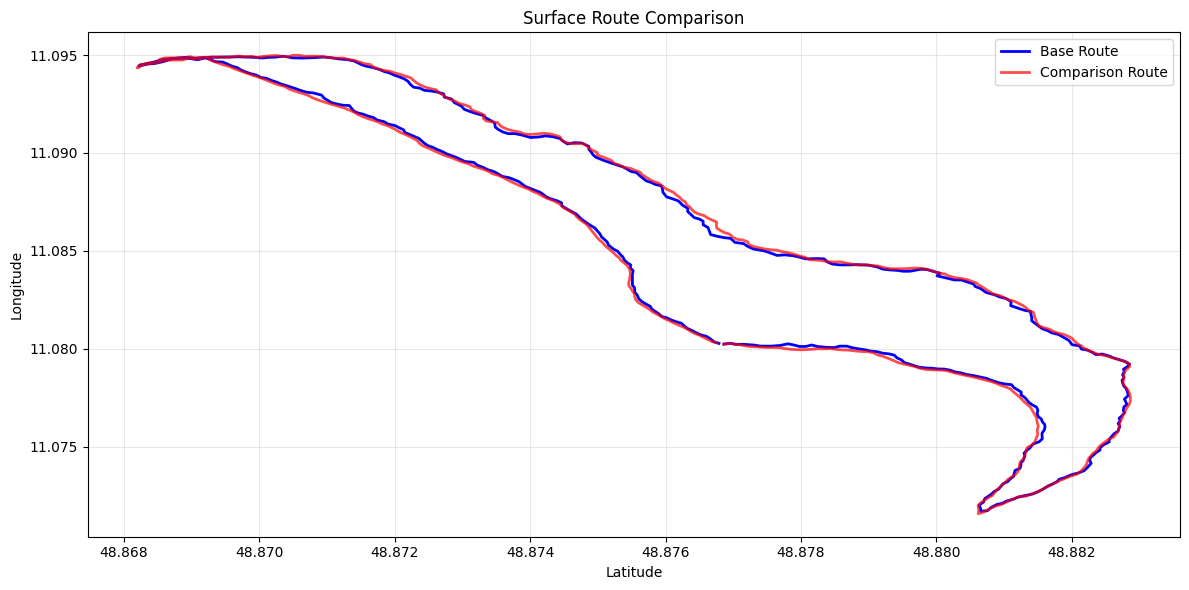

<Figure size 640x480 with 0 Axes>

In [17]:
%run main.py surface data/DollnsteinRoutePrashil.gpx --second-gpx data/DollnsteinRouteTom.gpx

### Plotting Synchronized Plots

Required:  
  `base_gpx` file  
  Exactly one comparison source using one of:  
    `--second-gpx`, `--add-openstreetmap`, `--add-openelevation`, `--add-loess1`, `--add-loess2`, or `--add-spline`  
  And a sync method via `--sync-method`

Optional:  
  `--tolerance` with `--tolerance-method` to visualize deviation zones

- Sync aligns distance/elevation between the base and comparison profile
- Only one comparison source is allowed when using `--sync-method`
- Works only with `--plot-type elevation`

**Examples:**


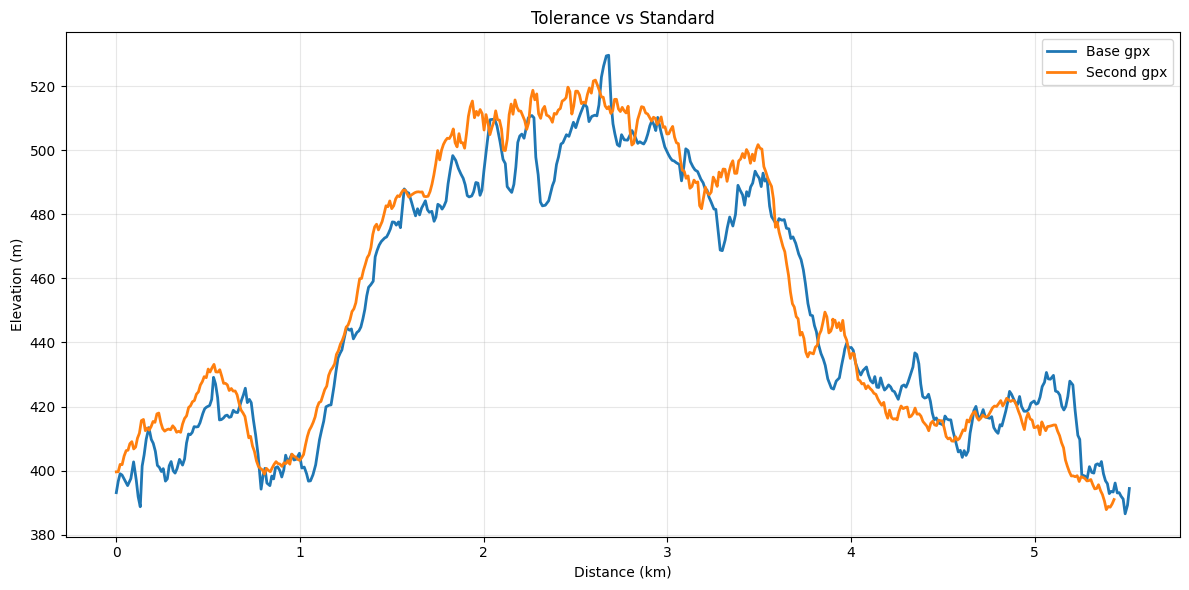

<Figure size 640x480 with 0 Axes>

In [18]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx --second-gpx data/DollnsteinRouteTom.gpx --tolerance 0.5 --tolerance-method standard --title "Tolerance vs Standard"


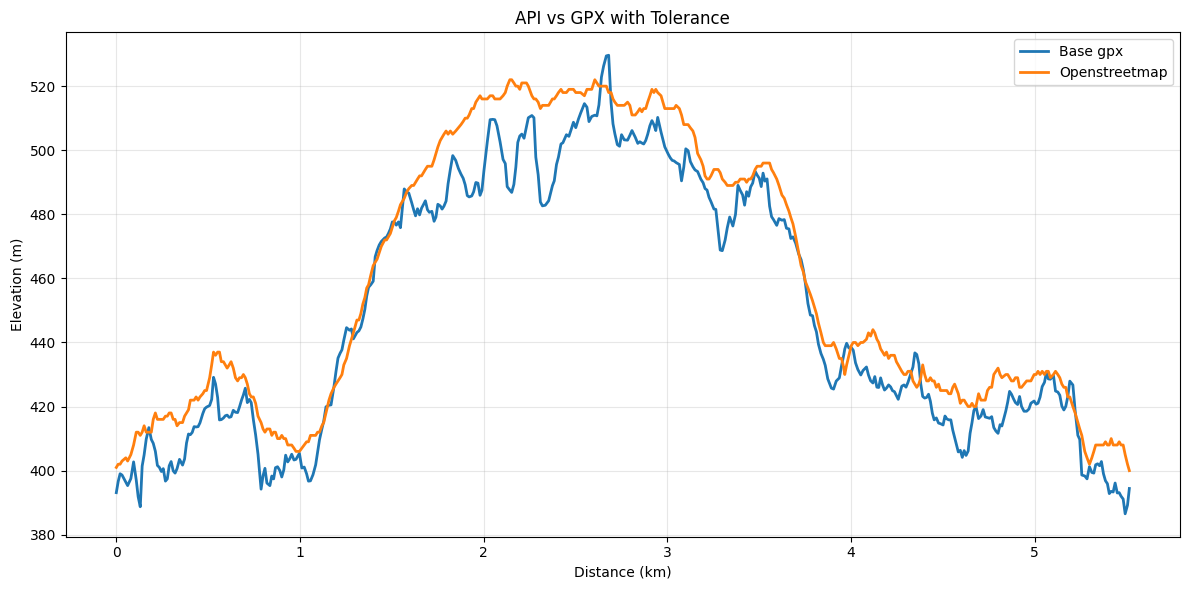

<Figure size 640x480 with 0 Axes>

In [19]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx --add-openstreetmap --tolerance 0.3 --tolerance-method kdtree --title "API vs GPX with Tolerance"


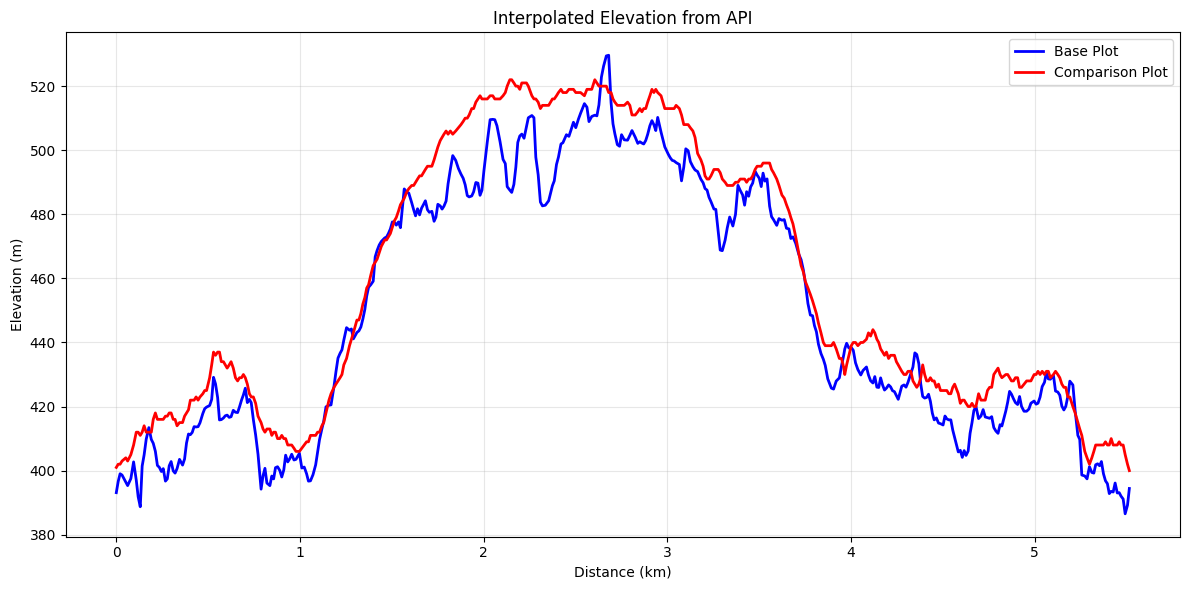

<Figure size 640x480 with 0 Axes>

In [20]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx  --add-openstreetmap --sync-method interpolate_elevations --title "Interpolated Elevation from API"


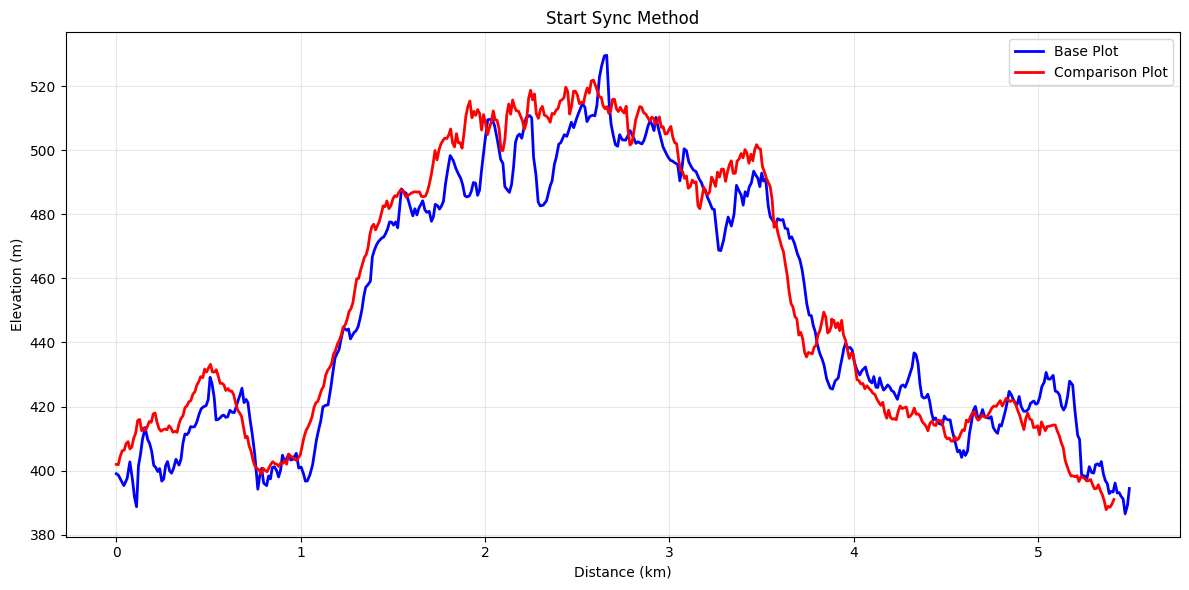

<Figure size 640x480 with 0 Axes>

In [21]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx --second-gpx data/DollnsteinRouteTom.gpx --sync-method start_sync --title "Start Sync Method"


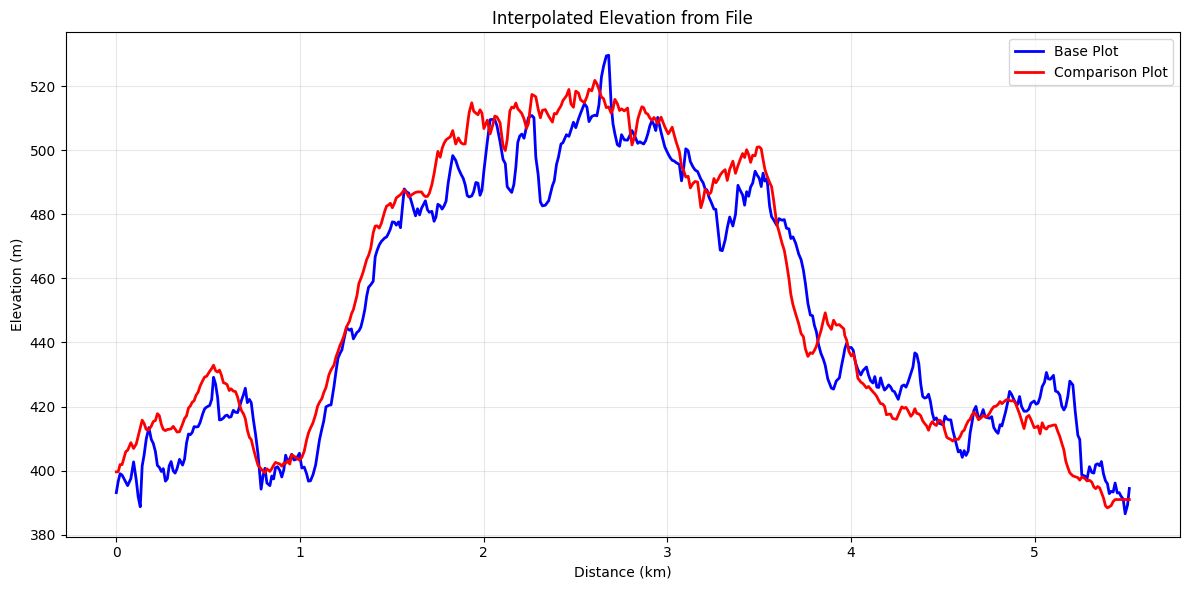

<Figure size 640x480 with 0 Axes>

In [22]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx --second-gpx data/DollnsteinRouteTom.gpx --sync-method interpolate_elevations --title "Interpolated Elevation from File"


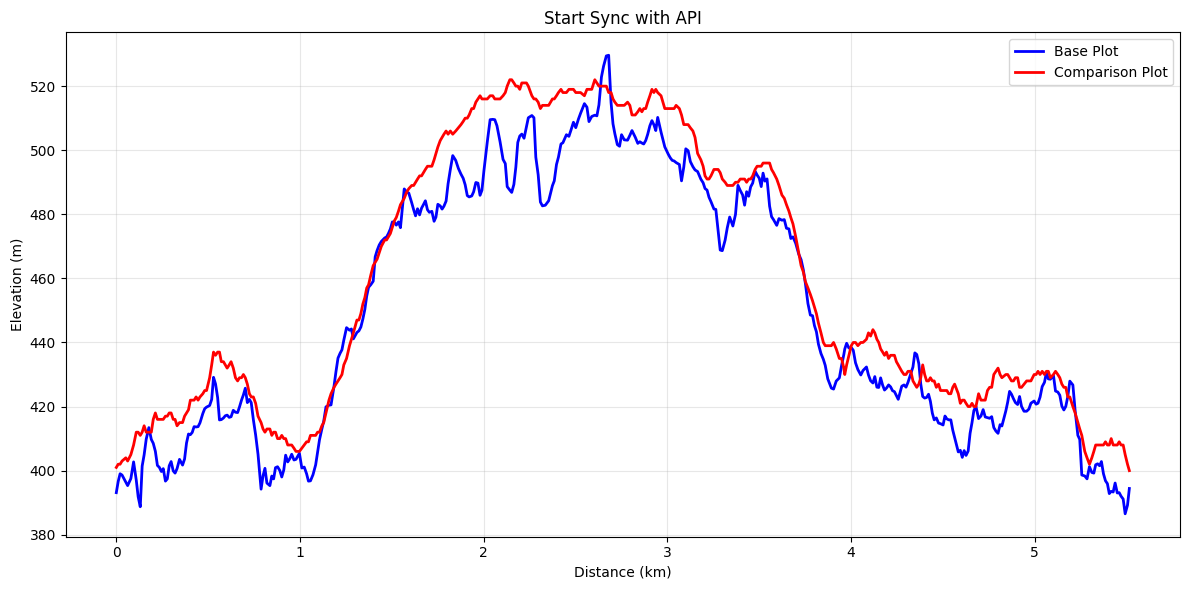

<Figure size 640x480 with 0 Axes>

In [23]:
%run main.py elevation data/DollnsteinRoutePrashil.gpx  --add-openstreetmap --sync-method start_sync --title "Start Sync with API"
